In [66]:
import numpy as np
import pandas as pd
import random

In [67]:
datas = "../dataset/true_datas.csv"
datas = pd.read_csv(datas)


In [68]:
def get_season(month):
    if month in [3, 4, 5]:   # Spring: March, April, May
        return 0
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 1
    elif month in [9, 10, 11]: # Autumn/Fall: September, October, November
        return 2
    else:   # Winter: December, January, February
        return 3

datas['Season'] = pd.to_datetime(datas['Entry']).dt.month.map(get_season)


In [69]:
datas = datas.drop(columns=['Exit','Entry'])
datas

,Days,Inverted,PerfMean,PerfStd,EntryLoad,ExitLoad,EntryDemand,ExitDemand,Distance,ContainerQuantity,...,Entry_wind_speed_10m_max,Entry_wind_gusts_10m_max,Entry_wind_direction_10m_dominant,Exit_precipitation_sum,Exit_rain_sum,Exit_snowfall_sum,Exit_wind_speed_10m_max,Exit_wind_gusts_10m_max,Exit_wind_direction_10m_dominant,Season
0,15.0,0.0,24.0,7.348469,0.0,0.0,0.0,0.0,0.00,2.0,...,26.980793,63.000000,247.30750,0.000000,0.000000,0.0,21.897945,42.120000,343.37125,3
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,9.70,2.0,...,21.897945,42.120000,343.37125,0.000000,0.000000,0.0,21.897945,42.120000,343.37125,3
2,5.0,0.0,5.0,0.000000,0.0,0.0,0.0,0.0,0.00,2.0,...,21.897945,42.120000,343.37125,3.700000,3.700000,0.0,19.174856,36.360000,242.80690,3
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,9.42,2.0,...,19.174856,36.360000,242.80690,3.700000,3.700000,0.0,19.174856,36.360000,242.80690,3
4,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.00,2.0,...,19.174856,36.360000,242.80690,17.600000,17.600000,0.0,21.096123,39.960000,251.11560,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2.0,1.0,2.0,0.000000,0.0,0.0,0.0,0.0,0.00,4.0,...,17.385378,34.792004,173.40240,1.955556,1.955556,0.0,17.385378,34.792004,173.40240,0
251,10.0,1.0,10.5,1.060660,0.0,0.0,0.0,0.0,6698.14,4.0,...,17.385378,34.792004,173.40240,1.955556,1.955556,0.0,17.385378,34.792004,173.40240,0
252,1.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.00,4.0,...,17.385378,34.792004,173.40240,1.955556,1.955556,0.0,17.385378,34.792004,173.40240,0
253,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,9.42,4.0,...,17.385378,34.792004,173.40240,1.955556,1.955556,0.0,17.385378,34.792004,173.40240,0


In [70]:
datas.dtypes, len(datas)

(Days                                 float64
 Inverted                             float64
 PerfMean                             float64
 PerfStd                              float64
 EntryLoad                            float64
 ExitLoad                             float64
 EntryDemand                          float64
 ExitDemand                           float64
 Distance                             float64
 ContainerQuantity                    float64
 Stage                                  int64
 Entry_Working_Day                      int64
 Exit_Working_Day                       int64
 Entry_precipitation_sum              float64
 Entry_rain_sum                       float64
 Entry_snowfall_sum                   float64
 Entry_wind_speed_10m_max             float64
 Entry_wind_gusts_10m_max             float64
 Entry_wind_direction_10m_dominant    float64
 Exit_precipitation_sum               float64
 Exit_rain_sum                        float64
 Exit_snowfall_sum                

In [114]:
# Function to perform data augmentation
def distribution_percentage(x):
    if x == 0:
        return x
    else:
        # Add a random value from a specified distribution
        return x*(1+abs(np.random.normal(0, 0.1)))

def weather_rain_distribution_percentage(x):
    r = random.random()
    if x == 0 and r<0.90:
        return x
    elif x == 0 and r>0.90:
        return np.random.normal(3.5, 7)
    else:
        # Add a random value from a specified distribution
        return x*(1+abs(np.random.normal(0, 0.1)))


def weather_snow_distribution_percentage(x):
    r = random.random()
    if r<0.95:
        return x
    elif r>0.95:
        return abs(np.random.normal(0.001, 0.0005))


def augment_data(df, augmentation_factor=1):
    augmented_data = []
    for _ in range(int(augmentation_factor-1)):
        # Apply transformation (for example, adding random noise)
        augmented_Days = df['Days'] + abs(np.random.normal(0, 0.05, len(df))) + abs(np.random.poisson(lam=0.025, size=len(df))*np.random.normal(0, np.sqrt(5), size=len(df)))
        
        # print(abs(np.random.poisson(lam=0.075, size=len(df))*np.random.normal(0, 10, size=len(df))))
        augmented_Inverted = df['Inverted']
        augmented_PerfMean = df['PerfMean'].apply(distribution_percentage)
        augmented_PerfStd = df['PerfStd'].apply(distribution_percentage) #Im supposed to compute them but no time
        augmented_EntryLoad = df['EntryLoad']
        augmented_ExitLoad = df['ExitLoad']
        augmented_EntryDemand = df['EntryDemand']
        augmented_ExitDemand = df['ExitDemand']
        augmented_Distance = df['Distance'].apply(distribution_percentage)
        augmented_ContainerQuantity =df['ContainerQuantity']
        augmented_Stage = df['Stage']
        augmented_Season = df['Season']
        augmented_Entry_Working_Day = df['Entry_Working_Day']
        augmented_Exit_Working_Day = df['Exit_Working_Day']
        augmented_Entry_rain_sum = df['Entry_rain_sum'].apply(weather_rain_distribution_percentage)
        augmented_Exit_rain_sum = df['Exit_rain_sum'].apply(weather_rain_distribution_percentage)
        augmented_Entry_snowfall_sum = df['Entry_snowfall_sum'].apply(weather_snow_distribution_percentage)
        augmented_Exit_snowfall_sum = df['Exit_snowfall_sum'].apply(weather_snow_distribution_percentage)
        mask = (~df['Exit_snowfall_sum'].isnull()) & (df['Season'] != 3)
        # Set values to 0
        # print((augmented_Exit_snowfall_sum == 0).sum())
        augmented_Exit_snowfall_sum.loc[mask] = 0
        # print((augmented_Exit_snowfall_sum == 0).sum())
        mask = (~df['Entry_snowfall_sum'].isnull()) & (df['Season'] != 3)
        # Set values to 0
        augmented_Entry_snowfall_sum.loc[mask] = 0
        augmented_Entry_precipitation_sum = augmented_Entry_rain_sum + augmented_Entry_snowfall_sum
        augmented_Exit_precipitation_sum = augmented_Exit_rain_sum + augmented_Exit_snowfall_sum
        augmented_Entry_wind_speed_10m_max = df['Entry_wind_speed_10m_max'] + np.random.normal(0, 0.6, len(df))
        augmented_Entry_wind_gusts_10m_max = df['Entry_wind_gusts_10m_max'] + np.random.normal(0, 1.2, len(df))
        augmented_Entry_wind_direction_10m_dominant = df['Entry_wind_direction_10m_dominant'] + np.random.normal(0, 10, len(df))
        augmented_Exit_wind_speed_10m_max = df['Exit_wind_speed_10m_max'] + np.random.normal(0, 0.6, len(df))
        augmented_Exit_wind_gusts_10m_max = df['Exit_wind_gusts_10m_max'] + np.random.normal(0, 1.2, len(df))
        augmented_Exit_wind_direction_10m_dominant = df['Exit_wind_direction_10m_dominant'] + np.random.normal(0, 10, len(df))
        
        # print(augmented_Days)
        
        # Create a new DataFrame with augmented data
        augmented_df = pd.DataFrame({
            'Days': augmented_Days,
            'Season' : augmented_Season,
            'Inverted': augmented_Inverted,
            'PerfMean': augmented_PerfMean,
            'PerfStd': augmented_PerfStd,
            'Distance': augmented_Distance,
            'EntryLoad': augmented_EntryLoad,
            'ExitLoad': augmented_ExitLoad,
            'EntryDemand': augmented_EntryDemand,
            'ExitDemand': augmented_ExitDemand,
            'ContainerQuantity': augmented_ContainerQuantity,
            'Stage': augmented_Stage,
            'Entry_Working_Day': augmented_Entry_Working_Day,
            'Exit_Working_Day': augmented_Exit_Working_Day,
            'Entry_precipitation_sum': augmented_Entry_precipitation_sum,
            'Exit_precipitation_sum': augmented_Exit_precipitation_sum,
            'Entry_snowfall_sum': augmented_Entry_snowfall_sum,
            'Exit_snowfall_sum': augmented_Exit_snowfall_sum,
            'Entry_rain_sum': augmented_Entry_rain_sum,
            'Exit_rain_sum': augmented_Exit_rain_sum,
            'Entry_wind_speed_10m_max': augmented_Entry_wind_speed_10m_max,
            'Entry_wind_gusts_10m_max': augmented_Entry_wind_gusts_10m_max,
            'Entry_wind_direction_10m_dominant': augmented_Entry_wind_direction_10m_dominant,
            'Exit_wind_speed_10m_max': augmented_Exit_wind_speed_10m_max,
            'Exit_wind_gusts_10m_max': augmented_Exit_wind_gusts_10m_max,
            'Exit_wind_direction_10m_dominant': augmented_Exit_wind_direction_10m_dominant
        })
        
        augmented_data.append(augmented_df)
    
    
    # Concatenate the original DataFrame with the augmented data
    augmented_df = pd.concat([df] + augmented_data, ignore_index=True)
    return augmented_df

# Number of times to augment the data
augmentation_factor = 2 # int

# Perform data augmentation
augmented_df = augment_data(datas, augmentation_factor)

print(len(augmented_df))
augmented_df[:20]


510


,Days,Inverted,PerfMean,PerfStd,EntryLoad,ExitLoad,EntryDemand,ExitDemand,Distance,ContainerQuantity,...,Entry_wind_speed_10m_max,Entry_wind_gusts_10m_max,Entry_wind_direction_10m_dominant,Exit_precipitation_sum,Exit_rain_sum,Exit_snowfall_sum,Exit_wind_speed_10m_max,Exit_wind_gusts_10m_max,Exit_wind_direction_10m_dominant,Season
0,15.0,0.0,24.000000,7.348469,0.0,0.0,0.0,0.0,0.00,2.0,...,26.980793,63.000000,247.30750,0.000000,0.000000,0.0,21.897945,42.120000,343.37125,3
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,9.70,2.0,...,21.897945,42.120000,343.37125,0.000000,0.000000,0.0,21.897945,42.120000,343.37125,3
2,5.0,0.0,5.000000,0.000000,0.0,0.0,0.0,0.0,0.00,2.0,...,21.897945,42.120000,343.37125,3.700000,3.700000,0.0,19.174856,36.360000,242.80690,3
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,9.42,2.0,...,19.174856,36.360000,242.80690,3.700000,3.700000,0.0,19.174856,36.360000,242.80690,3
4,1.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.00,2.0,...,19.174856,36.360000,242.80690,17.600000,17.600000,0.0,21.096123,39.960000,251.11560,3
5,11.0,0.0,10.375000,0.599479,0.0,2.0,0.0,2.0,6698.14,2.0,...,21.096123,39.960000,251.11560,0.000000,0.000000,0.0,12.144331,24.840000,351.42484,3
6,2.0,0.0,2.000000,0.000000,2.0,2.0,2.0,2.0,0.00,2.0,...,12.144331,24.840000,351.42484,2.000000,2.000000,0.0,16.735160,33.120000,280.13187,3
7,0.0,0.0,0.000000,0.000000,2.0,2.0,2.0,2.0,15.06,2.0,...,16.735160,33.120000,280.13187,2.000000,2.000000,0.0,16.735160,33.120000,280.13187,3
8,15.0,0.0,15.937500,3.630922,2.0,2.0,2.0,2.0,0.00,2.0,...,16.735160,33.120000,280.13187,0.600000,0.600000,0.0,18.416384,38.519997,253.16681,3
9,0.0,1.0,0.000000,0.000000,2.0,2.0,2.0,2.0,15.06,2.0,...,18.416384,38.519997,253.16681,0.600000,0.600000,0.0,18.416384,38.519997,253.16681,3


In [72]:
augmented_df[255:276]

,Days,Inverted,PerfMean,PerfStd,EntryLoad,ExitLoad,EntryDemand,ExitDemand,Distance,ContainerQuantity,...,Entry_wind_speed_10m_max,Entry_wind_gusts_10m_max,Entry_wind_direction_10m_dominant,Exit_precipitation_sum,Exit_rain_sum,Exit_snowfall_sum,Exit_wind_speed_10m_max,Exit_wind_gusts_10m_max,Exit_wind_direction_10m_dominant,Season
255,15.104165,0.0,25.969686,8.189661,0.0,0.0,0.0,0.0,0.000000,2.0,...,26.665964,63.099400,240.449678,0.000000,0.000000,0.000000,21.119359,41.949932,332.200425,3
256,0.174187,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,9.979884,2.0,...,22.202236,38.894667,346.823629,0.000000,0.000000,0.000000,21.967838,41.737391,338.904138,3
257,5.040128,0.0,5.316339,0.000000,0.0,0.0,0.0,0.0,0.000000,2.0,...,21.847372,41.680295,348.424483,3.845567,3.845567,0.000000,19.226317,36.305780,234.041849,3
258,0.010823,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,9.479613,2.0,...,19.091721,35.198966,238.773155,4.172336,4.172336,0.000000,19.215325,34.429813,221.511169,3
259,1.024281,0.0,1.107559,0.000000,0.0,0.0,0.0,0.0,0.000000,2.0,...,18.753854,36.430698,240.565466,19.778824,19.778824,0.000000,20.513213,39.852112,252.350559,3
260,11.261589,0.0,10.635774,0.629583,0.0,2.0,0.0,2.0,6843.468920,2.0,...,20.654155,39.089471,251.390681,0.008844,0.000000,0.008844,11.737257,25.566010,347.114368,3
261,2.060848,0.0,2.223709,0.000000,2.0,2.0,2.0,2.0,0.000000,2.0,...,12.170532,24.481734,347.970093,2.056282,2.056282,0.000000,16.625038,33.305964,285.017856,3
262,0.150434,0.0,0.000000,0.000000,2.0,2.0,2.0,2.0,16.747330,2.0,...,16.978059,31.562470,288.004089,2.162036,2.162036,0.000000,15.714357,34.557852,285.561879,3
263,15.010109,0.0,17.255699,3.682529,2.0,2.0,2.0,2.0,0.000000,2.0,...,15.758584,32.500844,289.637568,0.681893,0.681893,0.000000,18.340119,38.946533,246.856784,3
264,0.063504,1.0,0.000000,0.000000,2.0,2.0,2.0,2.0,17.895615,2.0,...,18.805397,40.410707,252.258788,0.647361,0.647361,0.000000,19.336623,37.728739,256.665253,3


In [73]:
datas['Exit_snowfall_sum'].describe()

count    255.000000
mean       0.000021
std        0.000123
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.000753
Name: Exit_snowfall_sum, dtype: float64

In [74]:
datas['Entry_wind_direction_10m_dominant']

0      247.30750
1      343.37125
2      343.37125
3      242.80690
4      242.80690
         ...    
250    173.40240
251    173.40240
252    173.40240
253    173.40240
254    173.40240
Name: Entry_wind_direction_10m_dominant, Length: 255, dtype: float64

In [75]:
augmented_df.to_csv('augmented_data.csv', index=False)

In [ ]:
augmented_df.to_csv('augmented_data.csv', index=False)

In [124]:
import plotly.graph_objects as go

# Convert DataFrame columns to NumPy arrays
days_original = datas['Days'].to_numpy()
rain_original = datas['Entry_rain_sum'].to_numpy()
wind_gusts_original = datas['Entry_wind_gusts_10m_max'].to_numpy()
snowfall_original = datas['Entry_snowfall_sum'].to_numpy()

# Calculate the difference between original and augmented data
delta_days = augmented_df['Days'][255:].to_numpy() - days_original
delta_rain = augmented_df['Entry_rain_sum'][255:].to_numpy() - rain_original
delta_wind_gusts = augmented_df['Entry_wind_gusts_10m_max'][255:].to_numpy() - wind_gusts_original
delta_snowfall = augmented_df['Entry_snowfall_sum'][255:].to_numpy() - snowfall_original

print(delta_days)

np.savetxt('delta_days.csv', delta_days, delimiter=',')
np.savetxt('delta_rain.csv', delta_rain, delimiter=',')
np.savetxt('delta_wind_gusts.csv', delta_wind_gusts, delimiter=',')
np.savetxt('delta_snowfall.csv', delta_snowfall, delimiter=',')




[4.63881393e-02 5.63998880e-02 4.20410000e-02 1.45159648e-02
 8.72179959e-02 5.05419798e-02 6.77074517e-02 5.51869116e-02
 3.05298652e-02 1.00057308e-01 5.87727768e-02 1.08568719e-02
 1.99717227e-02 2.98798033e-02 1.90501308e-02 4.79830031e-02
 1.58918973e-02 1.09566627e-01 5.83024258e-03 9.77515427e-03
 1.34451305e-02 8.70947064e-02 2.81087630e-02 2.34794483e-02
 3.39997615e-02 4.38570195e-03 2.98587750e-02 1.55982494e-02
 3.98004661e-02 4.15130234e-02 1.20497856e-02 6.06742428e-02
 8.63120624e-03 1.91469909e-02 8.08217334e-02 6.06411157e-02
 6.11213835e-02 8.02550038e-02 8.07009779e-02 4.21157457e-02
 7.33087003e-02 3.33323537e-02 4.14118012e-02 2.01757478e-02
 3.28556496e-03 6.64202531e-02 3.25544428e-02 6.21408915e-02
 5.90444715e-02 6.65154153e-01 5.78341470e-03 6.29139418e-02
 1.14455036e-02 2.29601371e-02 4.52869392e-01 4.26671229e-02
 5.30419698e-02 4.09246907e-02 5.94676430e-02 6.48144961e-03
 7.61973184e-02 8.22165558e-02 1.62719055e-02 2.04580110e-02
 6.90926679e-02 1.316542

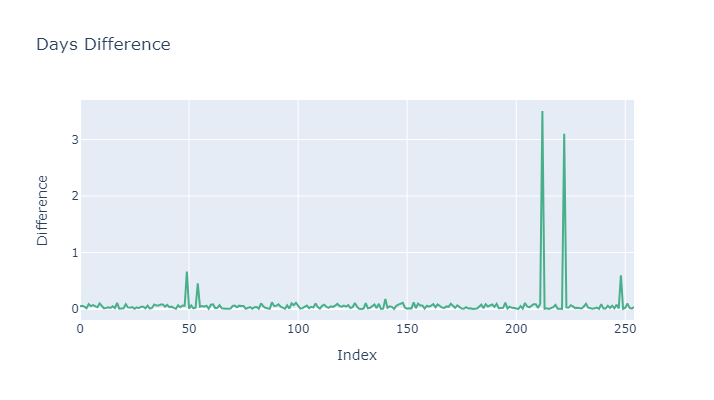

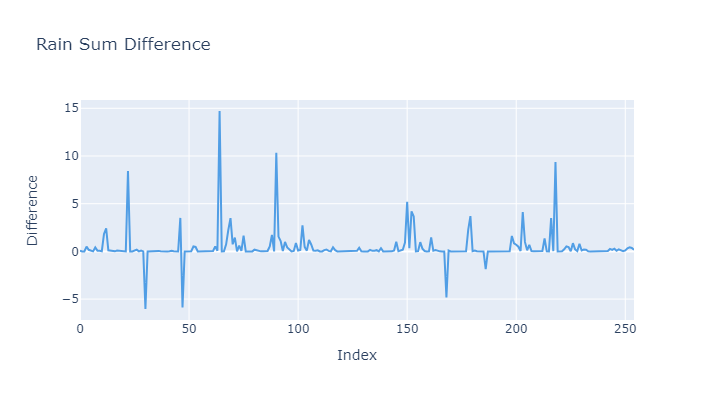

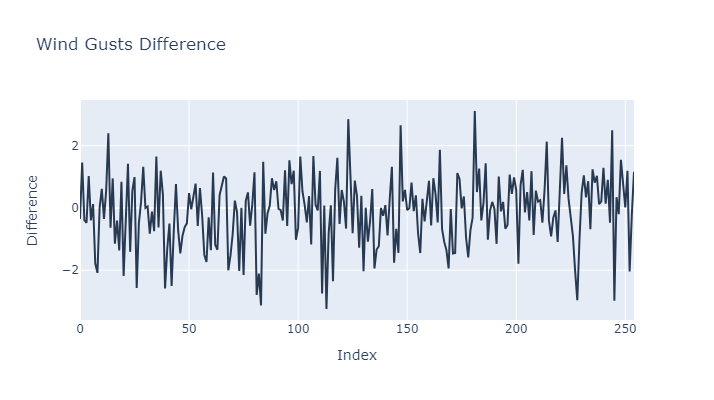

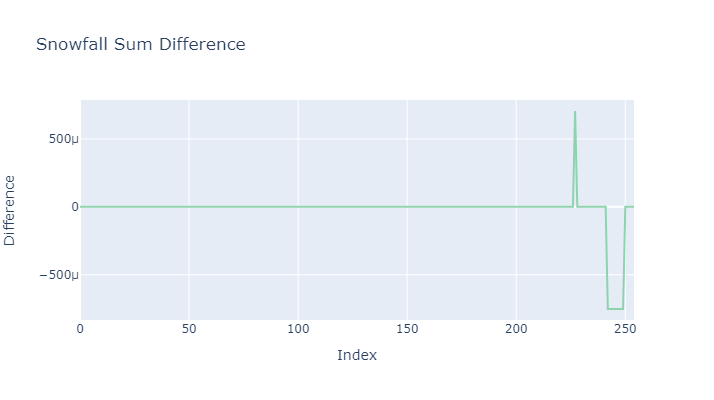

In [128]:
delta_days = np.genfromtxt('delta_days.csv', delimiter=',')
delta_rain = np.genfromtxt('delta_rain.csv', delimiter=',')
delta_wind_gusts = np.genfromtxt('delta_wind_gusts.csv', delimiter=',')
delta_snowfall = np.genfromtxt('delta_snowfall.csv', delimiter=',')

# Create subplots using Plotly
fig1 = go.Figure()
fig2 = go.Figure()
fig3 = go.Figure()
fig4 = go.Figure()

# Plot the difference for each variable
fig1.add_trace(go.Scatter(y=delta_days, mode='lines', name='Days Difference', line=dict(color='#48AF8A')))
fig2.add_trace(go.Scatter(y=delta_rain, mode='lines', name='Rain Sum Difference', line=dict(color='#519EE5')))
fig3.add_trace(go.Scatter(y=delta_wind_gusts, mode='lines', name='Wind Gusts Difference', line=dict(color='#283952')))
fig4.add_trace(go.Scatter(y=delta_snowfall, mode='lines', name='Snowfall Sum Difference', line=dict(color='#8ED3AE')))

# Update layout for each figure
fig1.update_layout(title='Days Difference', xaxis_title='Index', yaxis_title='Difference', width=800, height=400)
fig2.update_layout(title='Rain Sum Difference', xaxis_title='Index', yaxis_title='Difference', width=800, height=400)
fig3.update_layout(title='Wind Gusts Difference', xaxis_title='Index', yaxis_title='Difference', width=800, height=400)
fig4.update_layout(title='Snowfall Sum Difference', xaxis_title='Index', yaxis_title='Difference', width=800, height=400)

# Show plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()

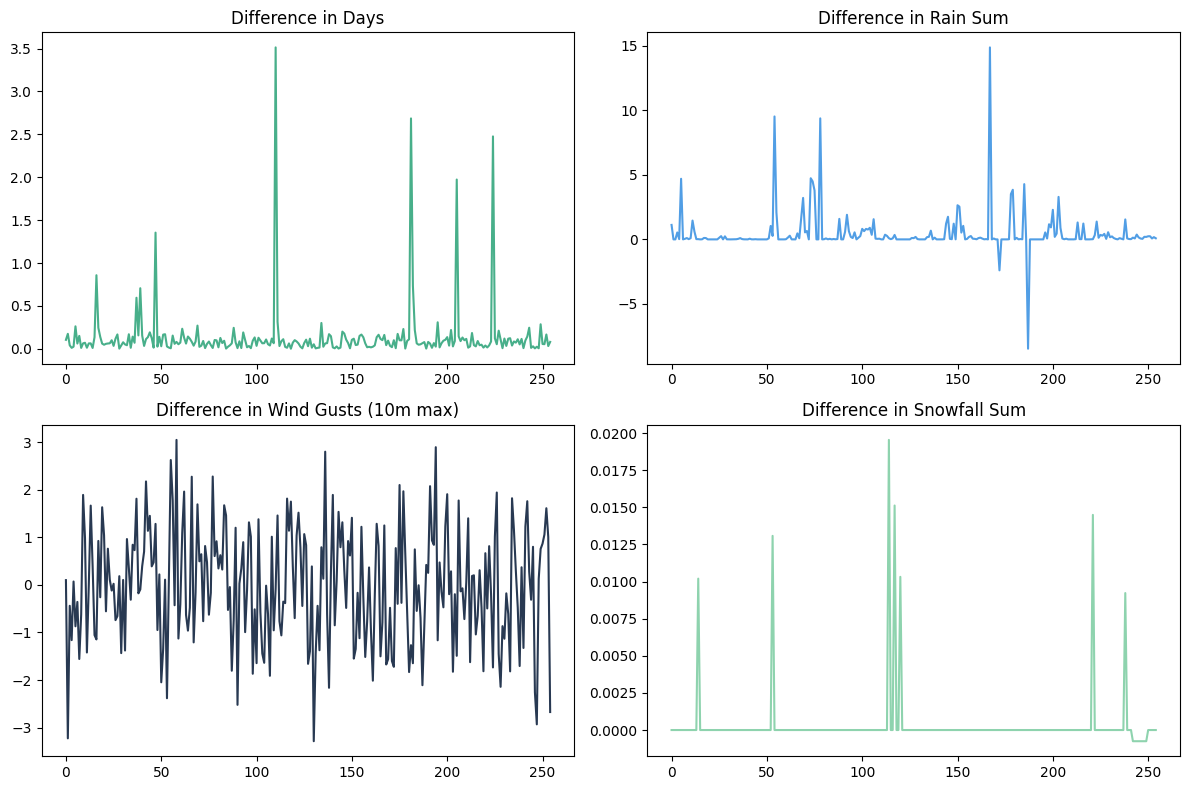

In [90]:
import matplotlib.pyplot as plt

# Convert DataFrame columns to NumPy arrays
days_original = datas['Days'].to_numpy()
rain_original = datas['Entry_rain_sum'].to_numpy()
wind_gusts_original = datas['Entry_wind_gusts_10m_max'].to_numpy()
snowfall_original = datas['Entry_snowfall_sum'].to_numpy()

# Calculate the difference between original and augmented data
delta_days = augmented_df['Days'][255:].to_numpy() - days_original
delta_rain = augmented_df['Entry_rain_sum'][255:].to_numpy() - rain_original
delta_wind_gusts = augmented_df['Entry_wind_gusts_10m_max'][255:].to_numpy() - wind_gusts_original
delta_snowfall = augmented_df['Entry_snowfall_sum'][255:].to_numpy() - snowfall_original

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the difference for each variable
axs[0, 0].plot(delta_days, color='#48AF8A')
axs[0, 0].set_title('Difference in Days')
axs[0, 1].plot(delta_rain, color='#519EE5')
axs[0, 1].set_title('Difference in Rain Sum')
axs[1, 0].plot(delta_wind_gusts, color='#283952')
axs[1, 0].set_title('Difference in Wind Gusts (10m max)')
axs[1, 1].plot(delta_snowfall, color='#8ED3AE')
axs[1, 1].set_title('Difference in Snowfall Sum')

# Show plot
plt.tight_layout()
plt.show()


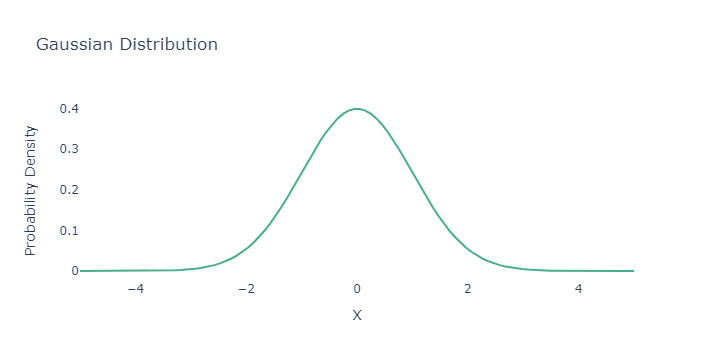

In [78]:
import plotly.graph_objs as go
import numpy as np

# Generate data for Gaussian distribution
x = np.linspace(-5, 5, 100)
y = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Create plotly figure
fig = go.Figure()

# Add Gaussian distribution curve
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', line=dict(color='#48AF8A', width=2), name='Gaussian Distribution'))

# Update layout
fig.update_layout(title='Gaussian Distribution',
                  xaxis_title='X',
                  yaxis_title='Probability Density',
                  plot_bgcolor='white')

# Show plot
fig.show()


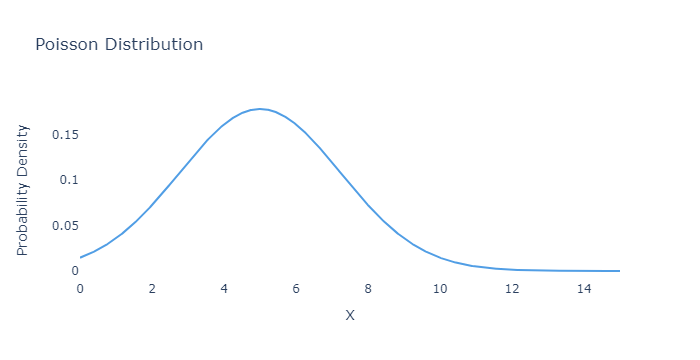

In [79]:
import plotly.graph_objects as go
import numpy as np
import math

# Define the parameter for the Poisson distribution
lam = 5  # lambda parameter for Poisson distribution

# Generate x values for plotting
x = np.linspace(0, 15, 1000)

# Calculate the PDF of the normal distribution using the mean and variance of the Poisson distribution
mu = lam
sigma = math.sqrt(lam)
pdf = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Create figure
fig = go.Figure()

# Add trace for the continuous approximation of the Poisson distribution using the normal distribution
fig.add_trace(go.Scatter(x=x, y=pdf, mode='lines', line=dict(color='#519EE5', width=2), name='Poisson Distribution'))

# Update layout
fig.update_layout(
    title='Poisson Distribution',
    xaxis_title='X',
    yaxis_title='Probability Density',
    plot_bgcolor='white'
)

# Show plot
fig.show()


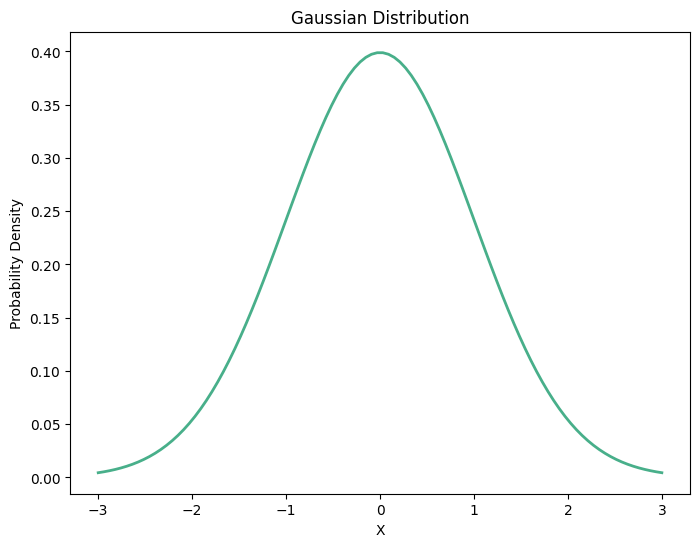

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data for Gaussian distribution
x = np.linspace(-3, 3, 100)
y = np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Define color palette
colors = ['#BFEEDB', '#8ED3AE', '#48AF8A', '#247B6C', '#CCE3F8', '#85C6EB', '#519EE5', '#283952', '#0F141C']

# Create plot
plt.figure(figsize=(8, 6))

# Plot Gaussian distribution curve
plt.plot(x, y, color=colors[2], linewidth=2)

# Add title and labels
plt.title('Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')

# Set background color
plt.gca().set_facecolor('white')

# Show plot
plt.grid(False)
plt.show()


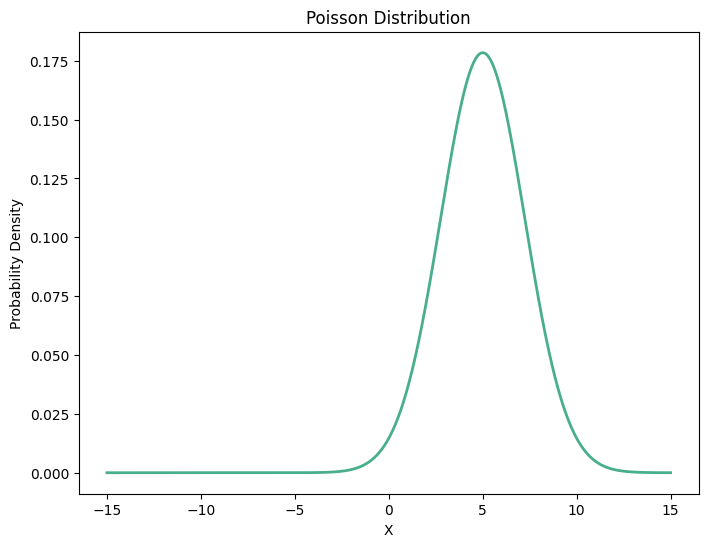

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Define the parameter for the Poisson distribution
lam = 5  # lambda parameter for Poisson distribution

# Generate x values for plotting
x = np.linspace(-15, 15, 1000)

# Calculate the PDF of the normal distribution using the mean and variance of the Poisson distribution
mu = lam
sigma = math.sqrt(lam)
pdf = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Define color palette
colors = ['#BFEEDB', '#8ED3AE', '#48AF8A', '#247B6C', '#CCE3F8', '#85C6EB', '#519EE5', '#283952', '#0F141C']

# Create plot
plt.figure(figsize=(8, 6))

# Plot the continuous approximation of the Poisson distribution using the normal distribution
plt.plot(x, pdf, color=colors[2], lw=2)

# Add title and labels
plt.title('Poisson Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')

# Set background color
plt.gca().set_facecolor('white')

# Show plot
plt.grid(False)
plt.show()
